<a href="https://colab.research.google.com/github/Byeonjinha/Colab/blob/main/Ch03.%EB%94%A5%EB%9F%AC%EB%8B%9D%20%EC%8B%A4%EC%8A%B5/5_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C_MNIST_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
"""
날짜 : 2021/10/27
이름 : 변진하
내용 : 텐서플로 MNIST 실습하기
"""
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import mse
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from PIL import Image

In [9]:
# 데이터 불러오기
#(mnist_train_data, mnist_train_label), (mnist_test_data, mnist_test_label) = load_data()
#mnist_train_data.shape
df_mnist_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/file/mnist_train.csv')
df_mnist_test  = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/file/mnist_test.csv')

mnist_train_data  = df_mnist_train.iloc[:, 1:] / 255
mnist_train_label = df_mnist_train.iloc[:, 0]

mnist_test_data  = df_mnist_test.iloc[:, 1:] / 255
mnist_test_label = df_mnist_test.iloc[:, 0]

[52977 17010 51141 14474 23099 22948]


TypeError: ignored

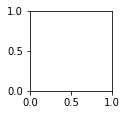

In [10]:
# 샘플 출력
random_idx = np.random.randint(60000, size=6)
print(random_idx)

plt.figure(figsize=(5, 5))

for i, idx in enumerate(random_idx):
  plt.subplot(3, 3, i+1)
  label = mnist_train_label[idx]
  plt.imshow(mnist_train_data[idx, :])
  plt.title('number : %d' % label)
  plt.axis('off')

In [11]:

# 라벨 원-핫 코드 변환
mnist_train_label = to_categorical(mnist_train_label)
mnist_test_label  = to_categorical(mnist_test_label)
mnist_train_label[1]


array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [12]:
# 모델 설계
model = Sequential()
model.add(Dense(units=784, input_dim=784, activation='sigmoid'))
model.add(Dense(units=10, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [13]:
# 모델 설정
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['acc'])

In [14]:

# 학습하기
model.fit(mnist_train_data, mnist_train_label, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3350 - acc: 0.9035
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1696 - acc: 0.9492
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1075 - acc: 0.9681
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0743 - acc: 0.9773
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0529 - acc: 0.9840
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0388 - acc: 0.9880
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0279 - acc: 0.9915
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0210 - acc: 0.9935
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0146 - acc: 0.9961
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0112 - acc: 0.9972


In [15]:
# 평가하기
result = model.evaluate(mnist_test_data, mnist_test_label)
result

313/313 [==============================] - 1s 3ms/step - loss: 0.0654 - acc: 0.9810


[0.0653858482837677, 0.9810000061988831]

In [16]:

# 새로운 이미지 불러오기
img1 = Image.open('/content/drive/MyDrive/Colab Notebooks/file/mnist_num1.jpg')
img2 = Image.open('/content/drive/MyDrive/Colab Notebooks/file/mnist_num2.jpg')
img3 = Image.open('/content/drive/MyDrive/Colab Notebooks/file/mnist_num3.jpg')
img4 = Image.open('/content/drive/MyDrive/Colab Notebooks/file/mnist_num4.jpg')
img5 = Image.open('/content/drive/MyDrive/Colab Notebooks/file/mnist_num5.jpg')
img1

In [17]:
# 이미지 픽셀 데이터 변환
img1_px = np.array(img1)
img2_px = np.array(img2)
img3_px = np.array(img3)
img4_px = np.array(img4)
img5_px = np.array(img5)

img1_px_reshaped = np.reshape(img1_px, (1, 784))
img2_px_reshaped = np.reshape(img2_px, (1, 784))
img3_px_reshaped = np.reshape(img3_px, (1, 784))
img4_px_reshaped = np.reshape(img4_px, (1, 784))
img5_px_reshaped = np.reshape(img5_px, (1, 784))

img_arr = np.array([img1_px_reshaped, img2_px_reshaped, img3_px_reshaped, img4_px_reshaped, img5_px_reshaped])
img_arr = img_arr / 255

In [19]:
# 새로운 이미지 테스트하기
 result = model.predict(img_arr)
 result.round()

IndentationError: ignored